In [1]:
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy as sp
import pandas
import torch
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

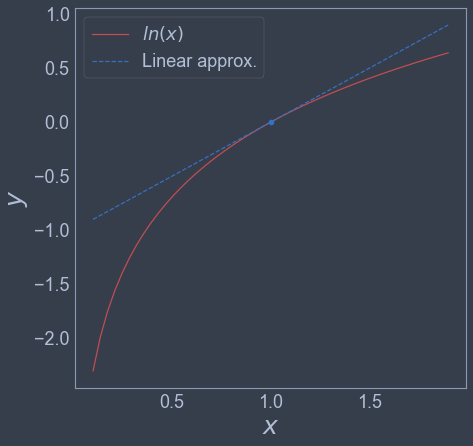

In [8]:
# 선형 근사 예제
# Taylor Series 이해 과정.

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

f = lambda x: np.log(x)
df = lambda x:1/x

x = np.linspace(0.1,1.9)

x0 = 1
L = lambda x: f(x0)+df(x0)*(x-x0)

ax.plot(x, f(x), c='r', label=r"$ln(x)$")
ax.plot(x, L(x), '--', c='b', label="Linear approx.")
ax.plot(1,0, 'o', c='b')

ax.legend(fontsize=18)

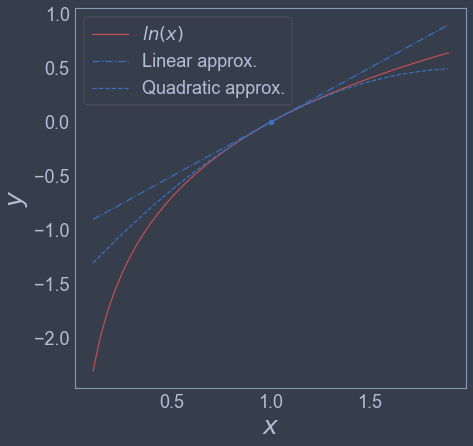

In [10]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

f = lambda x: np.log(x)
df = lambda x:1/x
df2 = lambda x:-1/x**2

x = np.linspace(0.1,1.9)

x0 = 1
Q = lambda x: f(x0)+df(x0)*(x-x0)+(1/2)*df2(x0)*(x-x0)**2

ax.plot(x, f(x), c='r', label=r"$ln(x)$")
ax.plot(x, L(x), '-.', c='b', label="Linear approx.")
ax.plot(x, Q(x), '--', c='b', label="Quadratic approx.")
ax.plot(1,0, 'o', c='b')

ax.legend(fontsize=18)

(-5.0, 5.0)

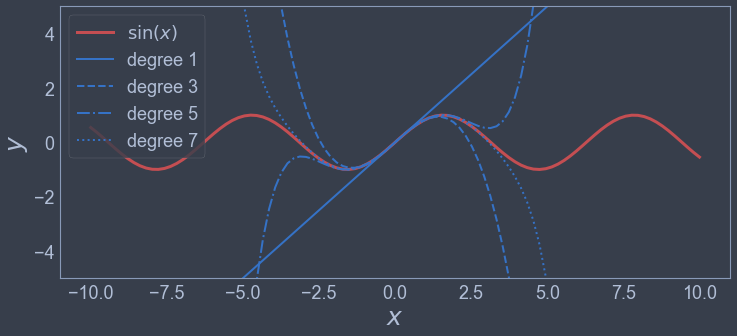

In [14]:
import math

degrees = (1,3,5,7)
ls = ('-','--','-.',':')

def taylor_e(x, a, n):
    """
    x* = a 에서 전개
    """
    signs = (1, -1, -1, 1)
    derivs = (np.cos, np.sin, np.cos, np.sin)
    
    fx = np.sin(a)
    
    for i in range(1, n+1):
        fx += (signs[(i%4)-1]*derivs[(i%4)-1](a)) / math.factorial(i)*(x-a)**i
    return fx

x = np.linspace(-10, 10, 100)
y = np.sin(x)

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

taylors = (taylor_e(x, 0, i) for i in degrees)
ax.plot(x, y , lw=3, color='r', 
        label="$\sin(x)$")

for i, taylor in enumerate(taylors) :
    ax.plot(x, taylor, lw=2, ls=ls[i], color='b', 
            label="degree {}".format(degrees[i]))


ax.legend(fontsize=18);
ax.set_ylim([-5, 5])

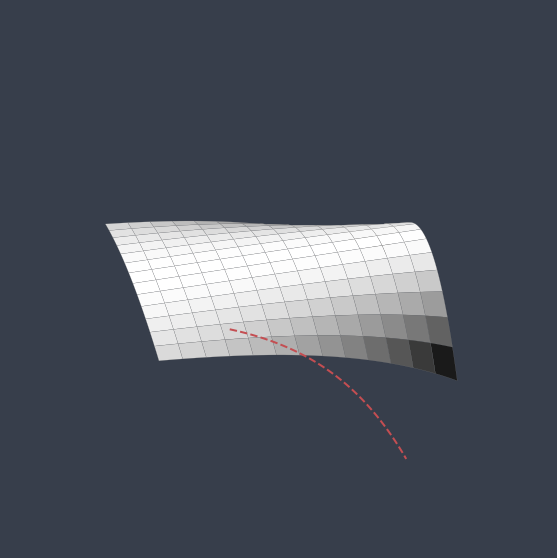

In [11]:
from mpl_toolkits.mplot3d import Axes3D

# f(x,y,z) = 0
x = y = np.arange(-1.0,1.0,0.05)
X ,Y = np.meshgrid(x,y)
Z = -(1/3)*(x**2)*(np.exp(Y))

# 곡선 c에 대한 변수 t와 x(t), y(t), z(t)
t = np.linspace(-0.5,0.5,100)
xt = np.array(2**t)
yt = np.array(t)
zt = -(1/3)*(xt**2)*(np.exp(yt))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# 곡면 그리기
ax.plot_surface(X, Y, Z, rstride=3, cstride=3,
               cmap=plt.cm.gray, edgecolor='gray', zorder=1)

# 곡면 위를 지나는 곡선 C = [xt, yt, zt]^T
ax.plot3D(xt,yt,zt,'--',lw=2,color='r', zorder=10)

ax.set_zlim(-1,1)
ax.set_axis_off()
ax.view_init(35,-15)

plt.show()

In [4]:
x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')

f = -sp.Rational(1,3)*x1**2*sp.E**x2

sp.derive_by_array(sp.derive_by_array(f,(x1,x2)),(x1,x2))

[[-2*exp(x2)/3, -2*x1*exp(x2)/3], [-2*x1*exp(x2)/3, -x1**2*exp(x2)/3]]

In [5]:
H = sp.derive_by_array(sp.derive_by_array(f,(x1,x2)),(x1,x2))
H.subs({x1:2,x2:0})

[[-2/3, -4/3], [-4/3, -4/3]]

In [8]:
x = sp.Symbol('x')
y = sp.Symbol('y')

f = 50*(y-x**2)**2 + (2-x)**2

C = sp.derive_by_array(f,(x,y))
Hf = sp.derive_by_array(C,(x,y))

In [9]:
C

[-200*x*(-x**2 + y) + 2*x - 4, -100*x**2 + 100*y]

In [10]:
Hf

[[600*x**2 - 200*y + 2, -200*x], [-200*x, 100]]

In [11]:
first_ncs_sol = sp.solve(C)

In [12]:
first_ncs_sol

[{x: 2, y: 4}]

In [13]:
H = Hf.subs({x:first_ncs_sol[0][x], y:first_ncs_sol[0][y]})
H

[[1602, -400], [-400, 100]]

In [14]:
# 고윳값 계산을 통해 양정행렬인지 판단이 가능하다.

H = np.array(H).astype(np.float64).reshape(2,2)
lamda, _ = np.linalg.eig(H)
lamda # 고윳값이 양수이므로 (2,4)가 최적해의 조건임을 확인했다.

array([1.70188248e+03, 1.17516927e-01])

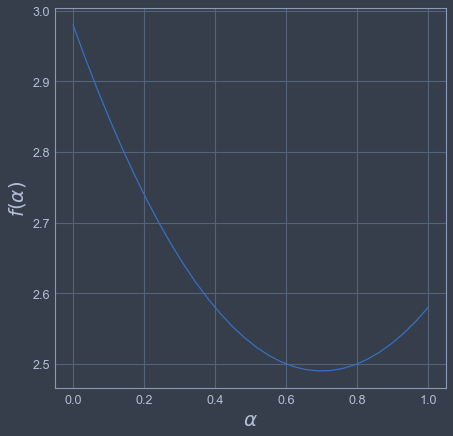

In [17]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1,1,1)

def f(x):
    return x[0]**2 + x[1]**2 +2

x_0 = np.array([0.7,0.7])
d = np.array([-1,0])

def f_alpha(a):
    return f(x_0.reshape(2,1) + a*d.reshape(2,1))

alphas = np.linspace(0,1,30)
ax.plot(alphas, f_alpha(alphas), 'b')
ax.set_xlabel(r'$\alpha$', fontsize=20)
ax.set_ylabel(r'$f(\alpha)$', fontsize=20)

plt.show()

In [20]:
def f1(X):
    return (X[0] + 2*X[1]-7)**2 + (2*X[0] + X[1] -5)**2

def df1(X):
    dx0 = 2*(X[0]+2*X[1]-7) +4*(2*X[0]+X[1]-5)
    dx1 = 4*(X[0]+2*X[1]-7) +2*(2*X[0]+X[1]-5)
    return np.array([dx0,dx1])

def f2(X):
    return 50*(X[1]-X[0]**2)**2 + (2-X[0])**2

def df2(X):
    dx0 = -200*X[0]*(X[1]-X[0]**2)-2*(2-X[0])
    dx1 = 100*(X[1]-X[0]**2)
    return np.array([dx0,dx1])

from scipy.optimize import line_search

# step 0. init: start point x^(0)
X = np.array([0, 4.5])

# 수렴 상수 설정
def SDM(f, df, x, eps=1.07e-7, callback=None):
    max_iter = 10000
    
    # step 0. set k = 0
    for k in range(max_iter):
        # step 1. calculate gradient vector
        c = df(x)
        
        # setp 2. 수렴 판정
        if np.linalg.norm(c) < eps :
            print(f"Stop criterion break Iter. :{k:5d}, x: {x}")
            break
        
        # step 3. 강하 방향 설정
        d = -c
        
        # step 4. 이동거리 계산
        # a_k 계산
        alpha = line_search(f, df, x, d)[0]
        
        # step 5. update
        x = x + alpha*d
        
        if callback:
            callback(x)
    else:
        print(f"Stop max iter:{k:5d} x : {x}")

SDM(f1, df1, X)

Stop criterion break Iter. :   61, x: [0.99999997 3.00000002]


In [21]:
x = np.array([-1,2])
SDM(f2,df2,x)

Stop max iter: 9999 x : [1.97426683 3.89766228]


Stop criterion break Iter. :   61, x: [0.99999997 3.00000002]


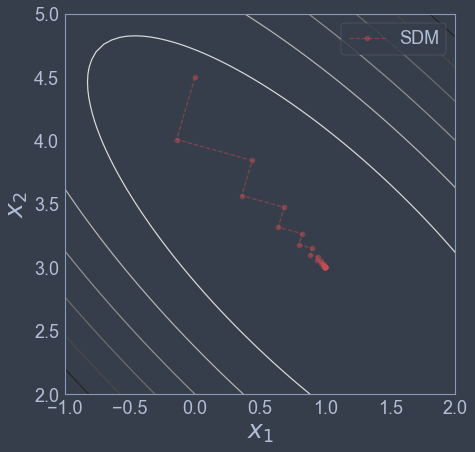

In [25]:
x = np.array([0, 4.5])

# 반복 히스토리를 저장할 전역변수와 콜백함수
sdm_path = [x, ]
def record_sdm(xk) :
    global sdm_path
    sdm_path.append(xk)    

SDM(f1, df1, x, callback=record_sdm)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1,1,1)

sdm_path = np.array(sdm_path)

x1 = np.linspace(-1, 2, 51)
x2 = np.linspace(2, 5, 51)
X1, X2 = np.meshgrid(x1, x2)

ax.contour(X1, X2, f1(np.array([X1,X2])), cmap=plt.cm.binary, linestyles="solid")
ax.plot(sdm_path[:,0], sdm_path[:,1], 'o--', alpha=0.5, color='r', label='SDM')
ax.legend(fontsize=18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x_1$', fontsize=25)
ax.set_ylabel(r'$x_2$', fontsize=25)
ax.grid(False)
    
plt.show()

In [26]:
# 1. 초기화: 시작점 x^(0)를 선정
x = np.array([0, 4.5])

def CGM(f, df, x, eps=1.0e-7, callback=None):
    max_iter = 10000
    
    # 반복 횟수 k=0으로 설정
    for k in range(max_iter):
        # 2. 경사도벡터 계산: c^(k) = ∇f(x^(k))를 계산
        c = df(x)

        # 3. 수렴판정: c^(k)<ϵ이면 x^*=x^(k)로 두고 정지, 아니면 단계를 계속 진행
        if np.linalg.norm(c) < eps :
            print("Stop criterion break Iter: {:5d}, x: {}".format(k, x))
            break

        # 4. 강하방향 설정: d^(k)=-c^(k) 또는 d^(k)=-c^(k)+ β_k*d^(k-1)
        if k == 0 :
            d = -c
        else:
            # F & R
            beta = (np.linalg.norm(c) / np.linalg.norm(c_old))**2
            # P * R
            # beta = (np.dot(c, c-c_old)) / np.linalg.norm(c_old)**2
            
            d = -c + beta*d

        # 5. 이동거리 계산: d^(k)를 따라 f(α)=f(x^(k)+α*d^(k))를 최소화하는 α_k를 계산
        alpha = line_search(f, df, x, d, c2=0.1)[0]
    
        
        # 6. 업데이트: x^(k+1)=(x^(k)+α_k*d^(k)로 변수를 업데이트하고 
        #             k=k+1로 두고 2로 가서 반복
        x = x + alpha * d

        # 7. 현재 정보 저장
        c_old = c.copy()
        
        # 외부함수를 실행 알고리즘과는 상관없고 사용자에 따라
        # 실행하고 싶은 작업이 있으면 callback함수로 실행시키기 위함
        if callback :
            callback(x)    

    else:
        print("Stop max iter:{:5d} x:{}".format(k, x)) 

CGM(f1, df1, x)

Stop criterion break Iter:     2, x: [1. 3.]


In [27]:

x = np.array([0, 4.5])

# 반복 히스토리를 저장할 전역변수와 콜백함수
cgm_path = [x, ]
def record_cgm(xk) :
    global cgm_path
    cgm_path.append(xk)

CGM(f1, df1, x, callback=record_cgm)

Stop criterion break Iter:     2, x: [1. 3.]


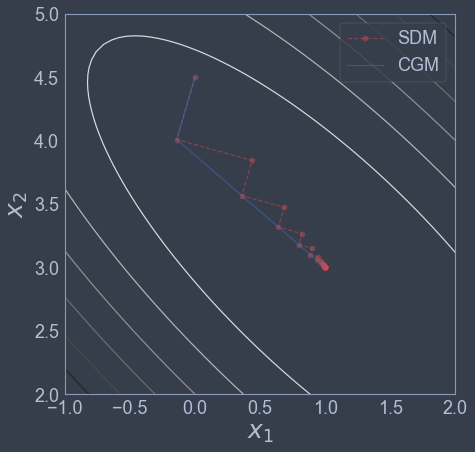

In [29]:

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1,1,1)

sdm_path = np.array(sdm_path)
cgm_path = np.array(cgm_path)

x1 = np.linspace(-1, 2, 51)
x2 = np.linspace(2, 5, 51)
X1, X2 = np.meshgrid(x1, x2)

ax.contour(X1, X2, f1(np.array([X1,X2])), cmap=plt.cm.binary, linestyles="solid")
ax.plot(sdm_path[:,0], sdm_path[:,1], 'o--', alpha=0.5, color='r', label='SDM')
ax.plot(cgm_path[:,0], cgm_path[:,1], 'x-', alpha=0.5, color='b', label='CGM')
ax.legend(fontsize=18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x_1$', fontsize=25)
ax.set_ylabel(r'$x_2$', fontsize=25)
ax.grid(False)

    
plt.show()

In [30]:

x = np.array([-1, 2])

CGM(f2, df2, x)

Stop criterion break Iter:    89, x: [1.99999993 3.99999972]


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 264
         Gradient evaluations: 88
[1.99999356 3.99997423]
Stop criterion break Iter:    89, x: [1.99999993 3.99999972]


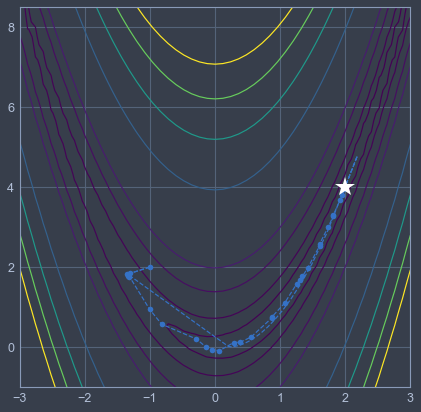

In [31]:

from scipy import optimize

# 반복 히스토리를 저장할 전역변수와 콜백함수
scipy_path = [x, ]
def record_hist(xk) :
    global scipy_path
    scipy_path.append(xk)

cgm_path = [x, ]
def record_cgm(xk) :
    global cgm_path
    cgm_path.append(xk)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cg.html
result_scipy = optimize.fmin_cg(f2, x, callback=record_hist)
print(result_scipy)
scipy_path = np.asarray(scipy_path)

CGM(f2, df2, x, callback=record_cgm)
cgm_path = np.asarray(cgm_path)

x1 = np.linspace(-3, 3, 51)
x2 = np.linspace(-1, 8.5, 51)
X1, X2 = np.meshgrid(x1, x2)

Z = f2([X1, X2])

levels1 = np.linspace(8, 20, 1)
levels2 = np.linspace(30, 100, 2)
levels3 = np.linspace(200, 2500, 5)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
ax.contour(X1, X2, Z, levels=np.concatenate((levels1, levels2, levels3)))
ax.plot(scipy_path[:,0], scipy_path[:,1], 'o--', color='b')
ax.plot(cgm_path[:,0], cgm_path[:,1], 'x--', color='b')
ax.plot(2, 4, '*', markerfacecolor='w', markeredgecolor='r', markersize=20)
plt.show()